## Importing necessery library:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import pickle

###### Project Description
###### Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to ######## ###### hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical ###### care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization ###### ###### expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , ###### bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
###### Columns                                            
###### •	age: age of primary beneficiary
###### •	sex: insurance contractor gender, female, male
###### •	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of ###### body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
###### •	children: Number of children covered by health insurance / Number of dependents
###### •	smoker: Smoking
###### •	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
###### •	charges: Individual medical costs billed by health insurance

###### Predict : Can you accurately predict insurance costs?


### DATA IMPORT AND ANALYSIS

In [2]:
## Importing the data set:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/medical_cost_insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA non graphical analysis of DATA:

In [3]:
df.shape ### Shape of the data[no of rows and columns]

(1338, 7)

In [4]:
df.columns ### column name..

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.dtypes ###data types of column

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
pd.isnull(df).sum() ## Sum of null value by each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
## Modification of object into numarical value:
df['region']=df['region'].replace({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
df['sex']=df['sex'].replace({'male':0,'female':1})
df['smoker']=df['smoker'].replace({'yes':1,'no':0})

<AxesSubplot:>

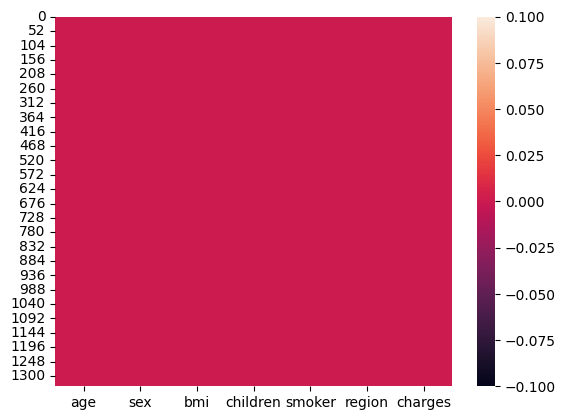

In [8]:
### heat map:
sns.heatmap(df.isnull())

In [9]:
## Analysis of DATA by data description
df.describe()
## conclusion:
### no null values
### Age and BMI is equally distributed data

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


#### From the description we can conclude the below point-
#####   there is no null value
#####   maybe there will be outlier present in charges and bmi
#####   age, bmi is mor or less perfetly distributed data
#####   there will be skewness in charges column.
#####   No of observation is moderate not high.

## HEAT MAP OF DESCRIPTION

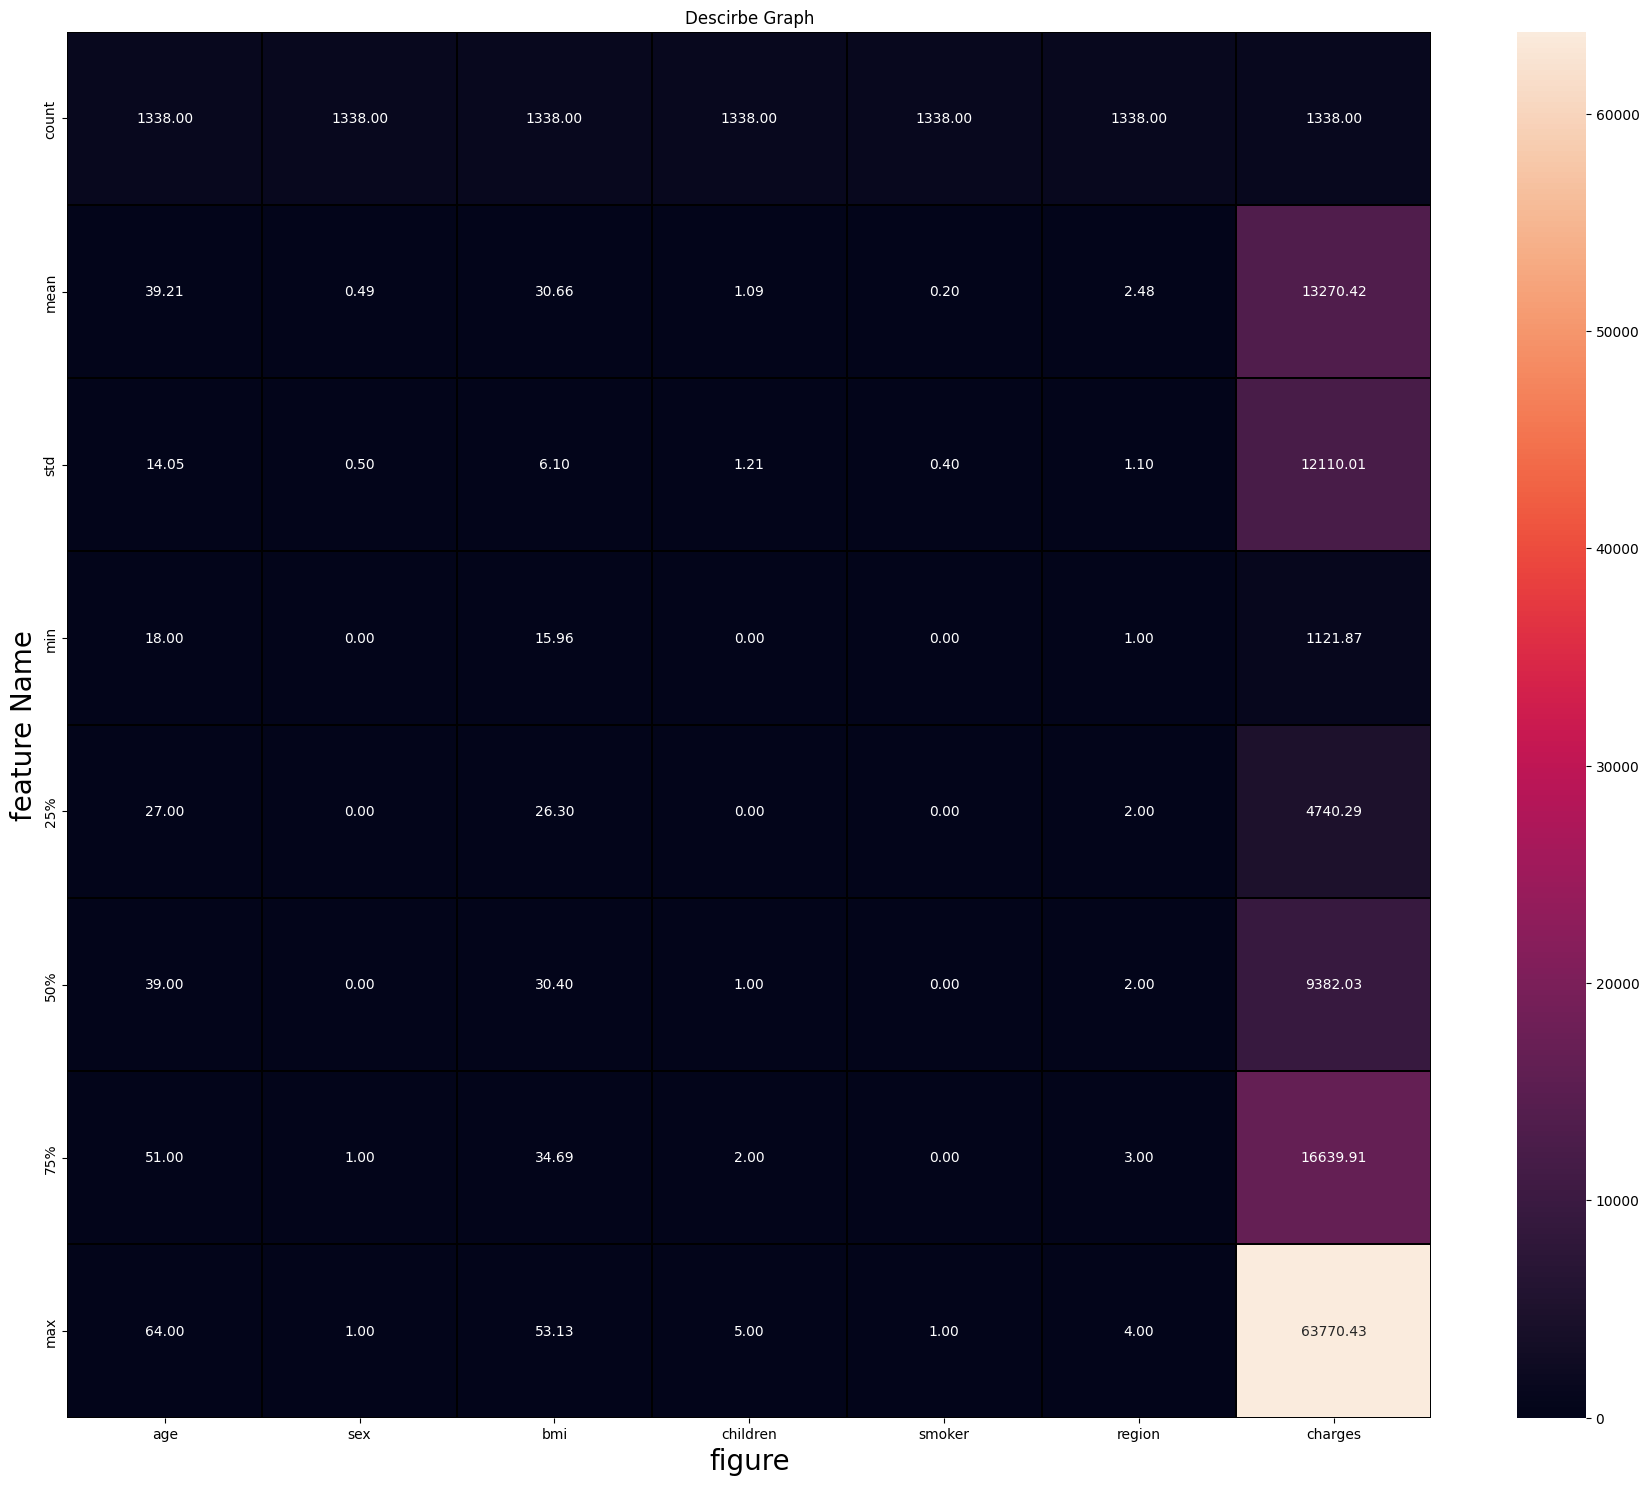

In [10]:
plt.figure(figsize=(22,18))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='black')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature Name',fontsize=20)
plt.title('Descirbe Graph')
plt.show()

### Plotting the data analyse the relationship

##### reg plot

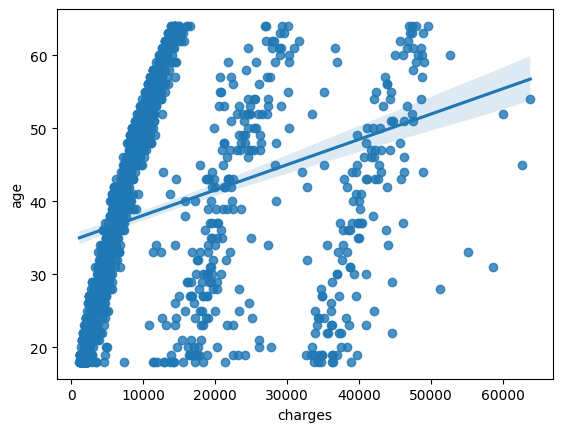

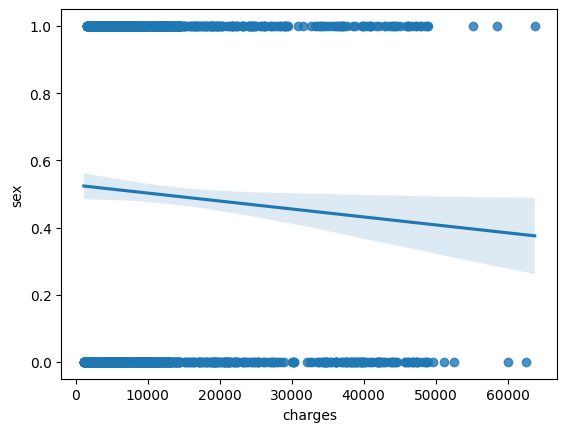

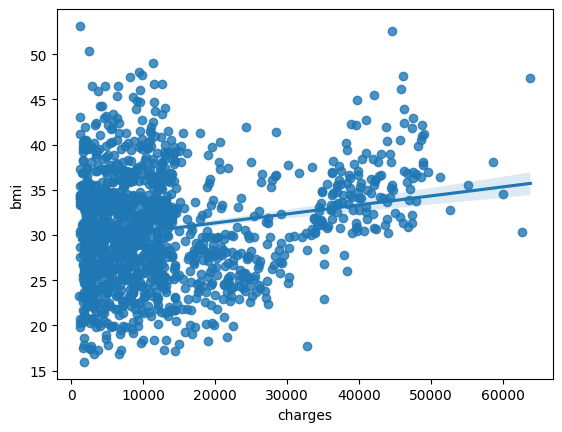

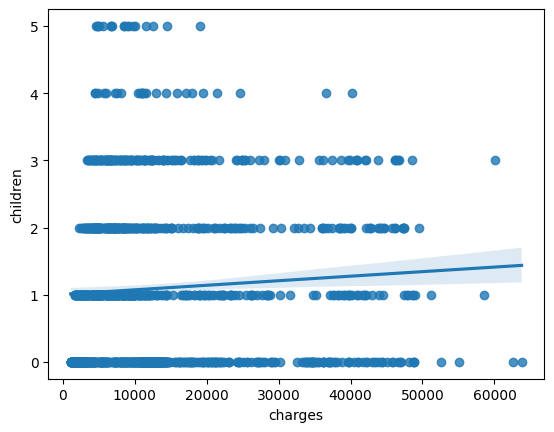

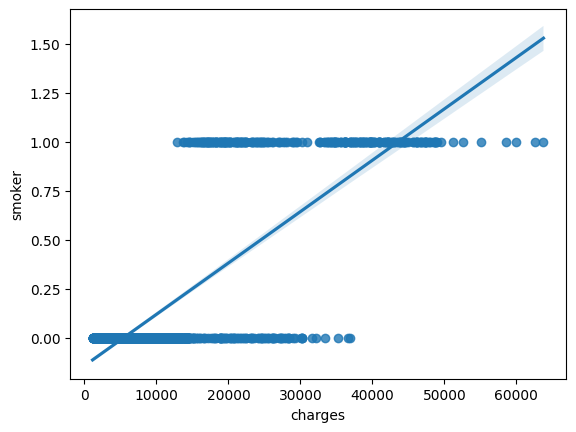

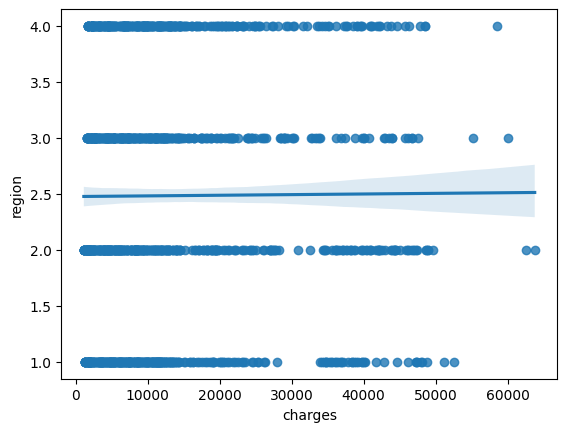

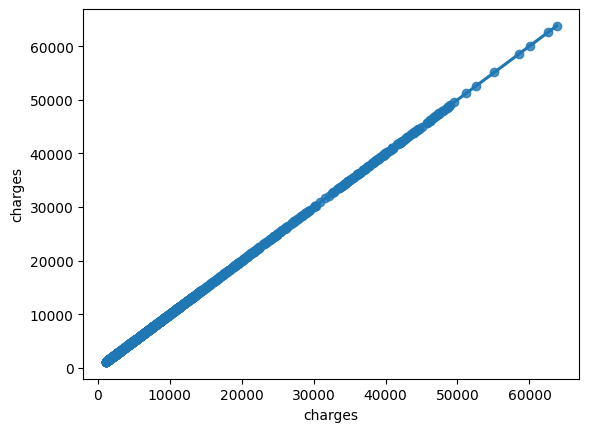

In [11]:
# Get the list of column names
columns = df.columns
plotnumber=1
# Create reg plots in a loop
for i in range(len(columns)):
        if plotnumber<=6:
                sns.regplot(x='charges', y=columns[i], data=df)
        plotnumber=+1
        plt.show()

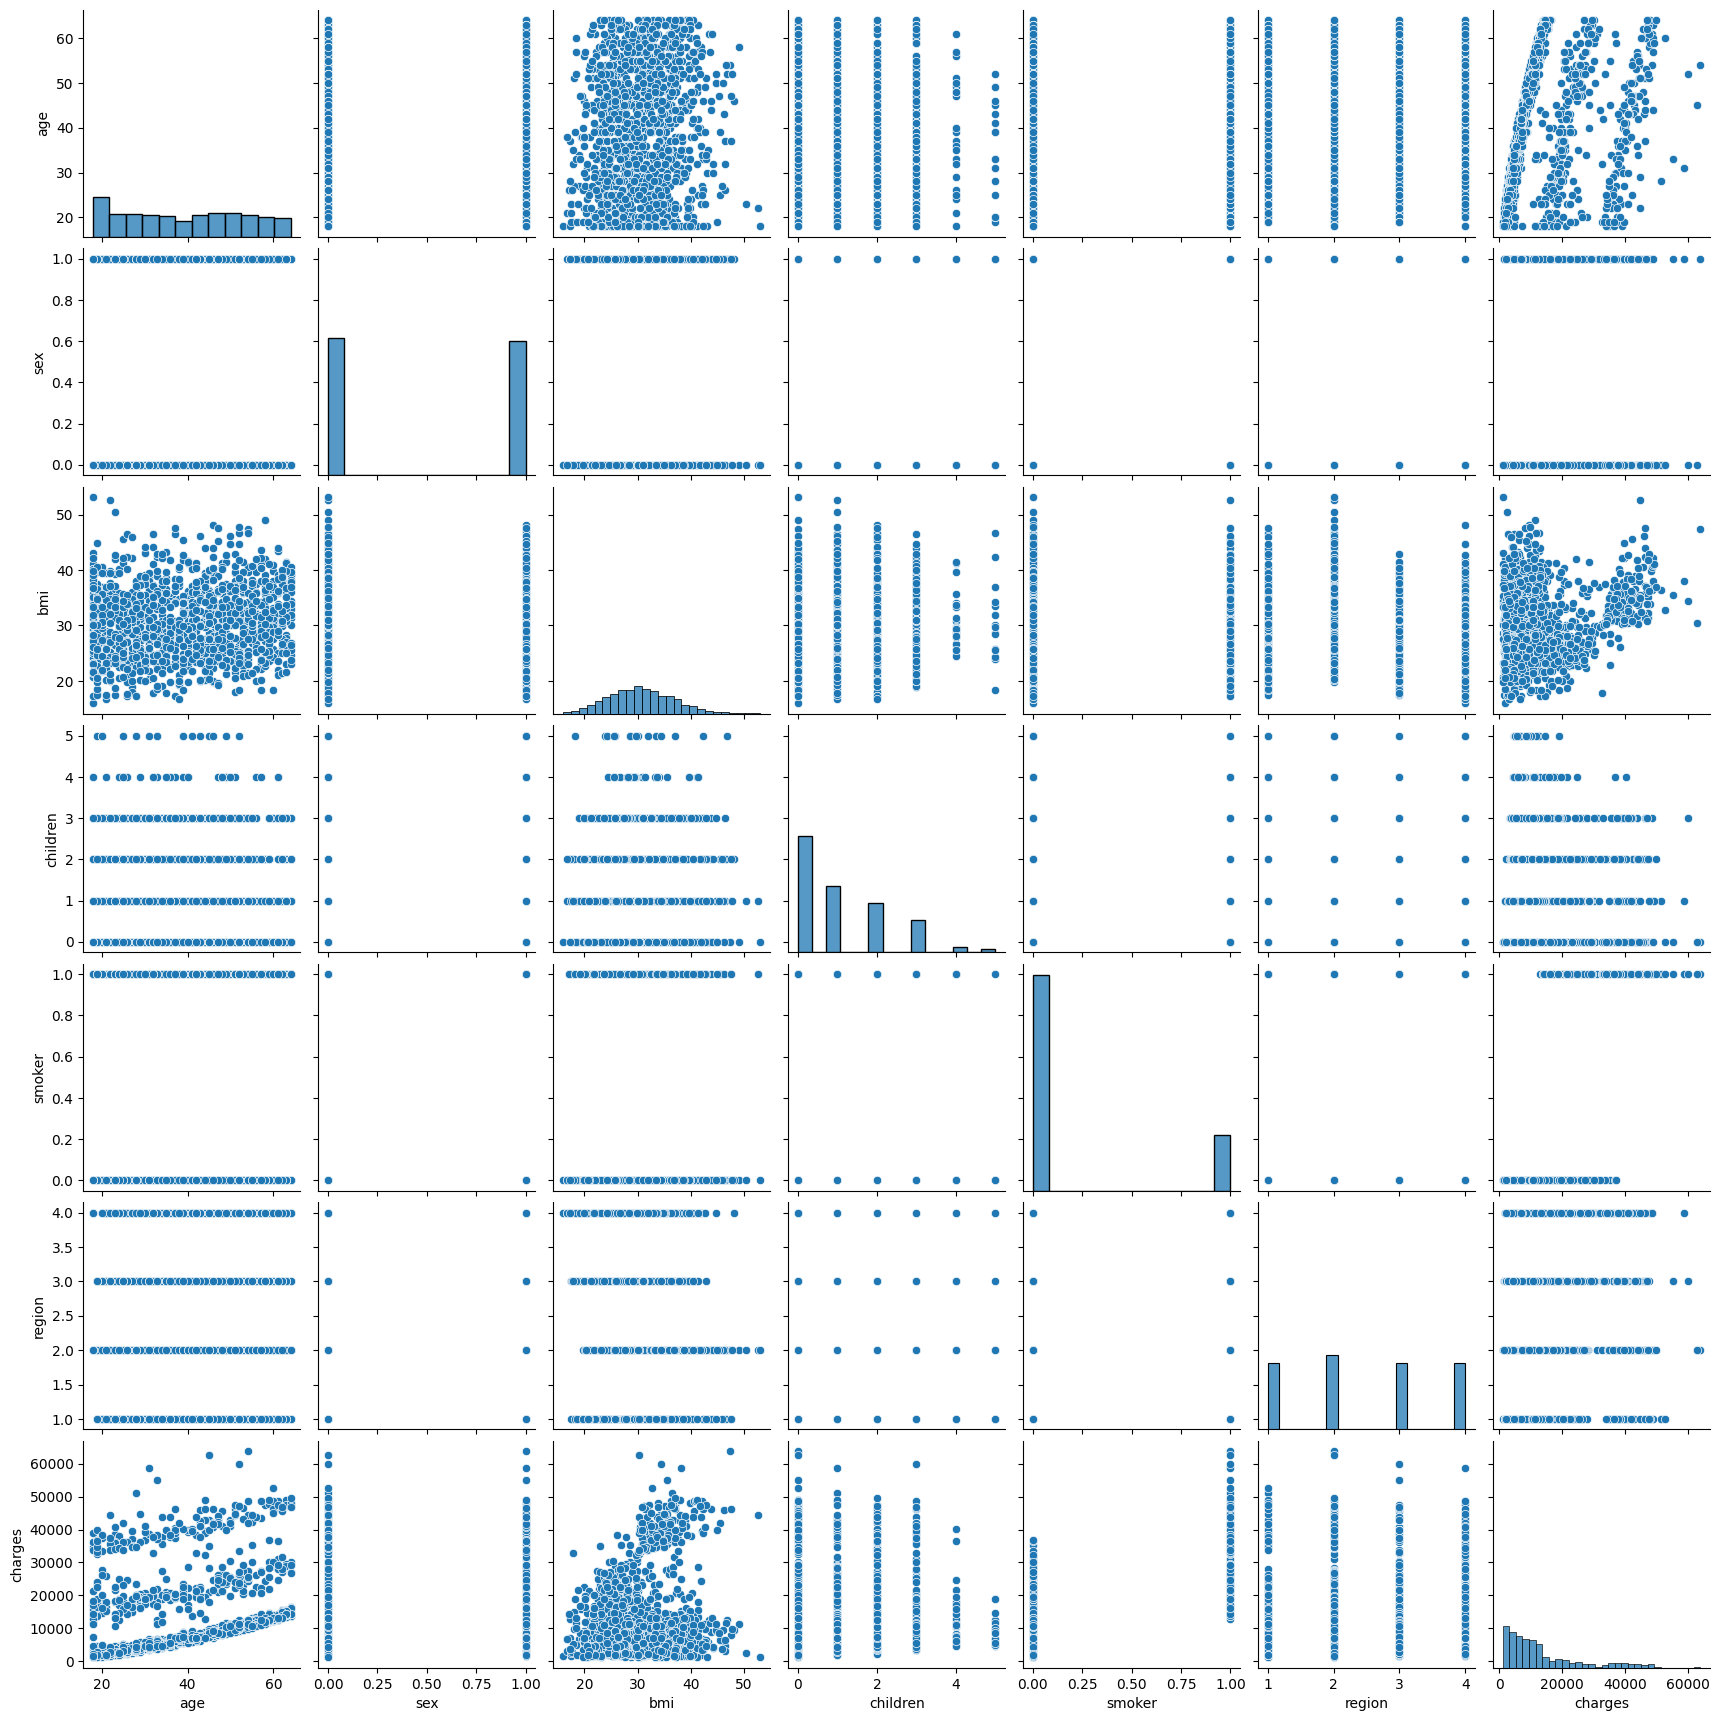

In [12]:
sns.pairplot(data=df,palette='dark')

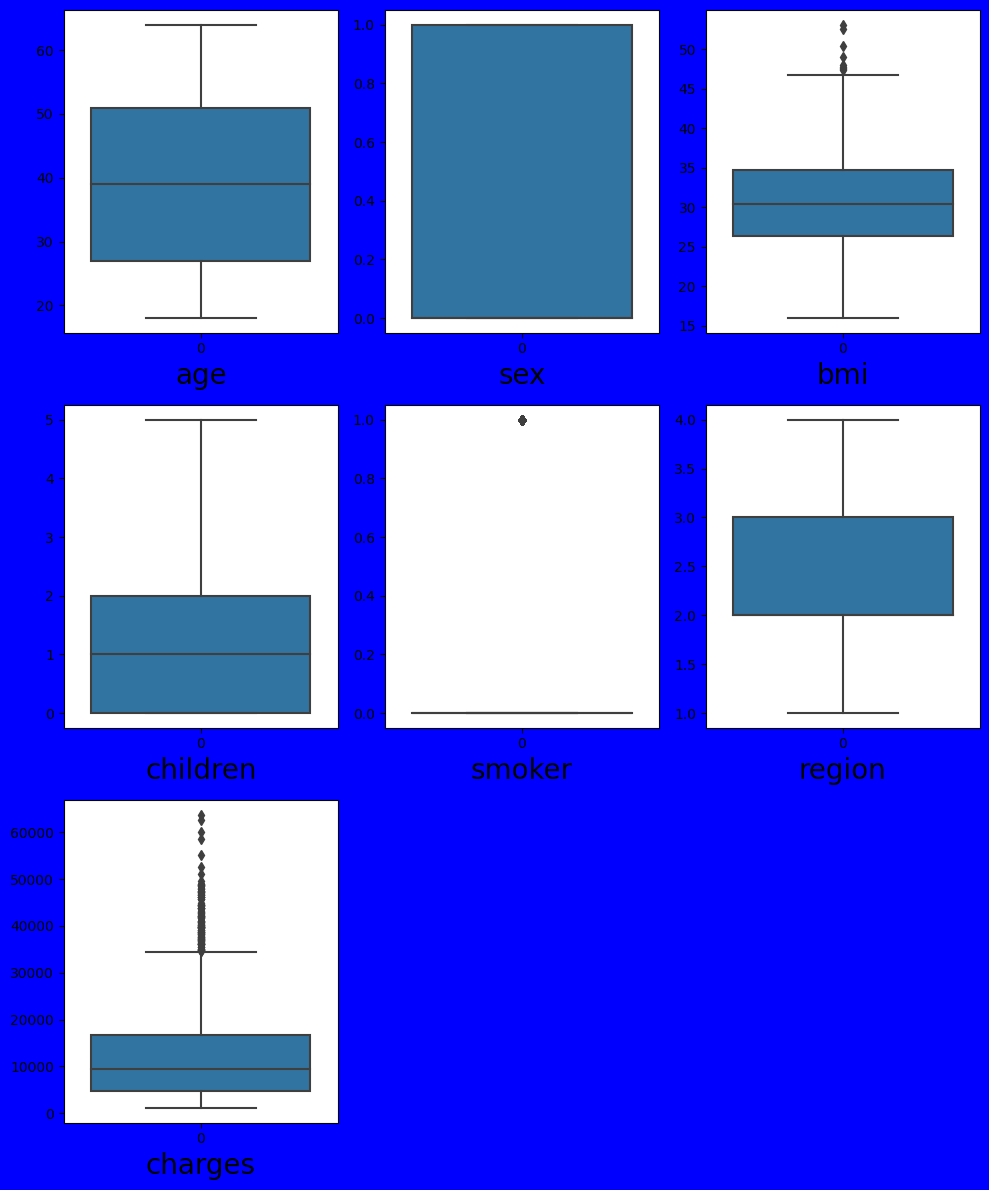

In [13]:
plt.figure(figsize=(10,12),facecolor='blue')
plotnumber=1
for column in df:
    anext=plt.subplot(3,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize='20')
    plotnumber+=1
plt.tight_layout() 

## FINDING Z SCORE

In [14]:
columns=df.columns
out_lier=df[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
df1=df[(z<3).all(axis=1)]
print('## dataloss:')
print((df.shape[0]-df1.shape[0])/(df.shape[0])*100)

## dataloss:
2.167414050822123


### REMOVING OUT LIER USING QUANTILE METHOD

In [15]:
## Outlier removal of data set:
q3=df.quantile(0.75)
q1=df.quantile(0.25)
iqr=(q3-q1)

In [16]:
bmi_high=(q3.bmi+1.5*iqr.bmi)
bmi_low=(q1.bmi-1.5*iqr.bmi)
bmi_index=np.where(df['bmi']>bmi_high)
df2=df.drop(df.index[bmi_index])
df2.reset_index()


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,1,27.900,0,1,1,16884.92400
1,1,18,0,33.770,1,0,2,1725.55230
2,2,28,0,33.000,3,0,2,4449.46200
3,3,33,0,22.705,0,0,3,21984.47061
4,4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,0,30.970,3,0,3,10600.54830
1325,1334,18,1,31.920,0,0,4,2205.98080
1326,1335,18,1,36.850,0,0,2,1629.83350
1327,1336,21,1,25.800,0,0,1,2007.94500


In [17]:
charges_high=(q3.charges+1.5*iqr.charges)
charges_low=(q3.charges+1.5*iqr.charges)
charges_index=(np.where(df['charges']>charges_high))
df2=df.drop(df.index[charges_index])
df2.reset_index()
df2.shape

(1199, 7)

In [18]:
print('data loss%')
print((df.shape[0]-df2.shape[0])/(df.shape[0])*100)

data loss%
10.388639760837071


## AS QUANTILE METHOD DATA LOSS IS HIGH WE ACCEPTED Z_SCORE METHOD FOR REMOVING OUTLIER 

In [19]:
## delete inactive column
df1=df1.drop(columns='region')

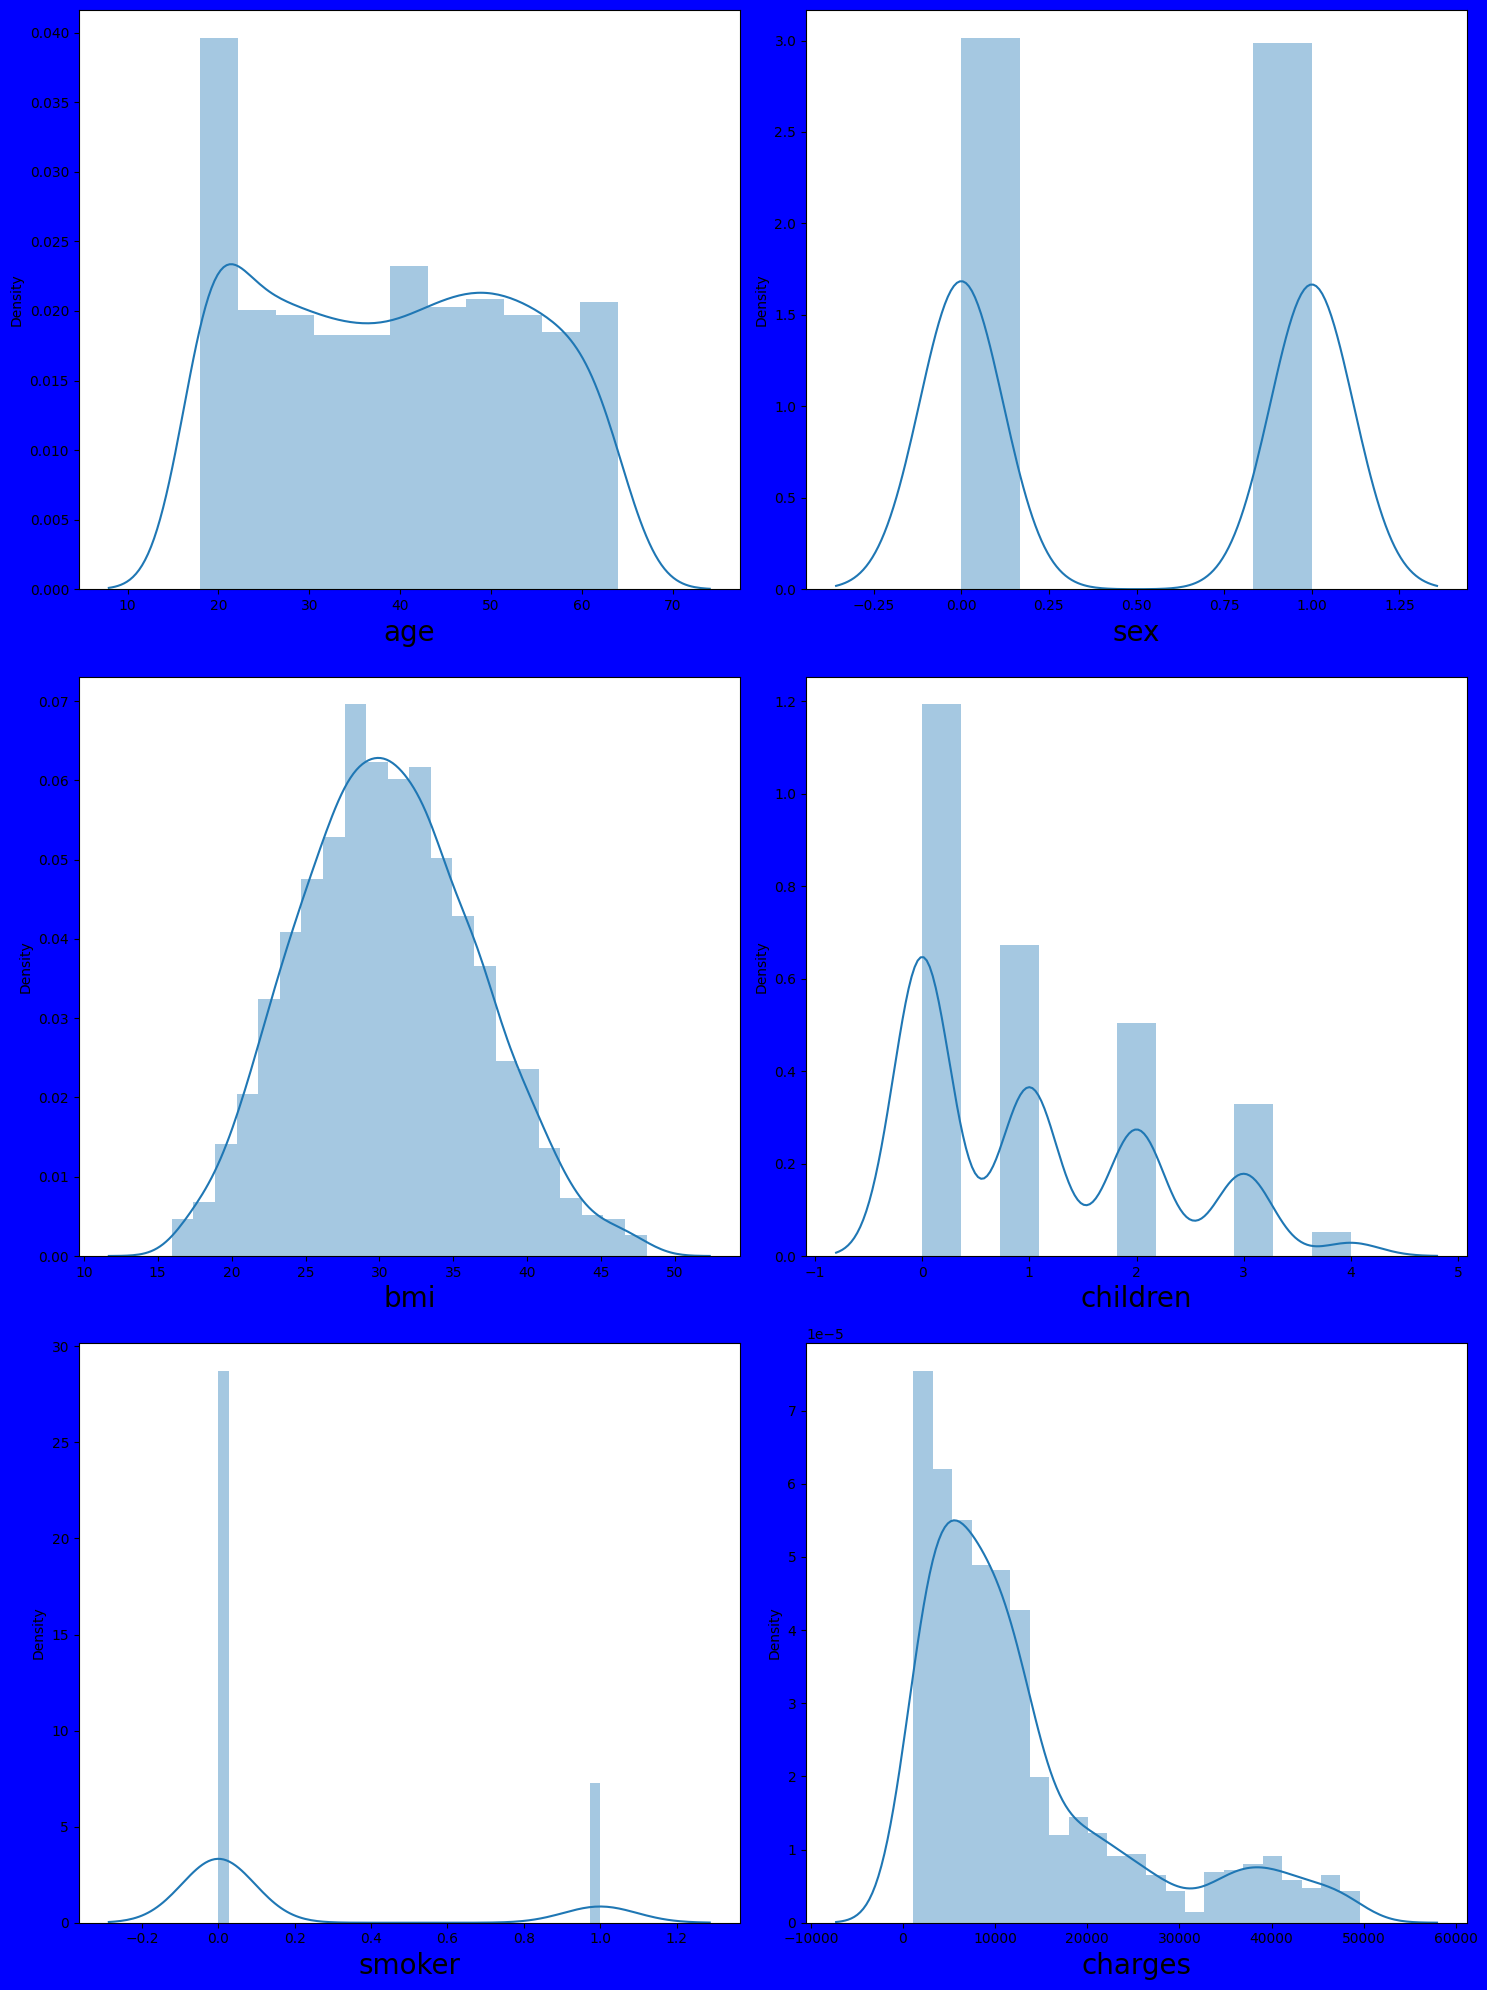

In [20]:
## plot distribution
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in df1:
    anext=plt.subplot(3,2,plotnumber)
    sns.distplot(df1[column])
    plt.xlabel(column,fontsize='20')
    plotnumber+=1
plt.tight_layout()    

### Analysis of skewness

In [21]:
df1.skew()

age         0.051340
sex         0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
charges     1.437160
dtype: float64

In [22]:
## Removing Skewness:
df1['charges']=np.cbrt(df['charges'])
df1['smoker']=np.cbrt(df['smoker'])

In [23]:
df1.skew()

age         0.051340
sex         0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
charges     0.481700
dtype: float64

### Correlation value of features:

In [24]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [25]:
x=df1.drop(columns=['charges'])
y=df1['charges']

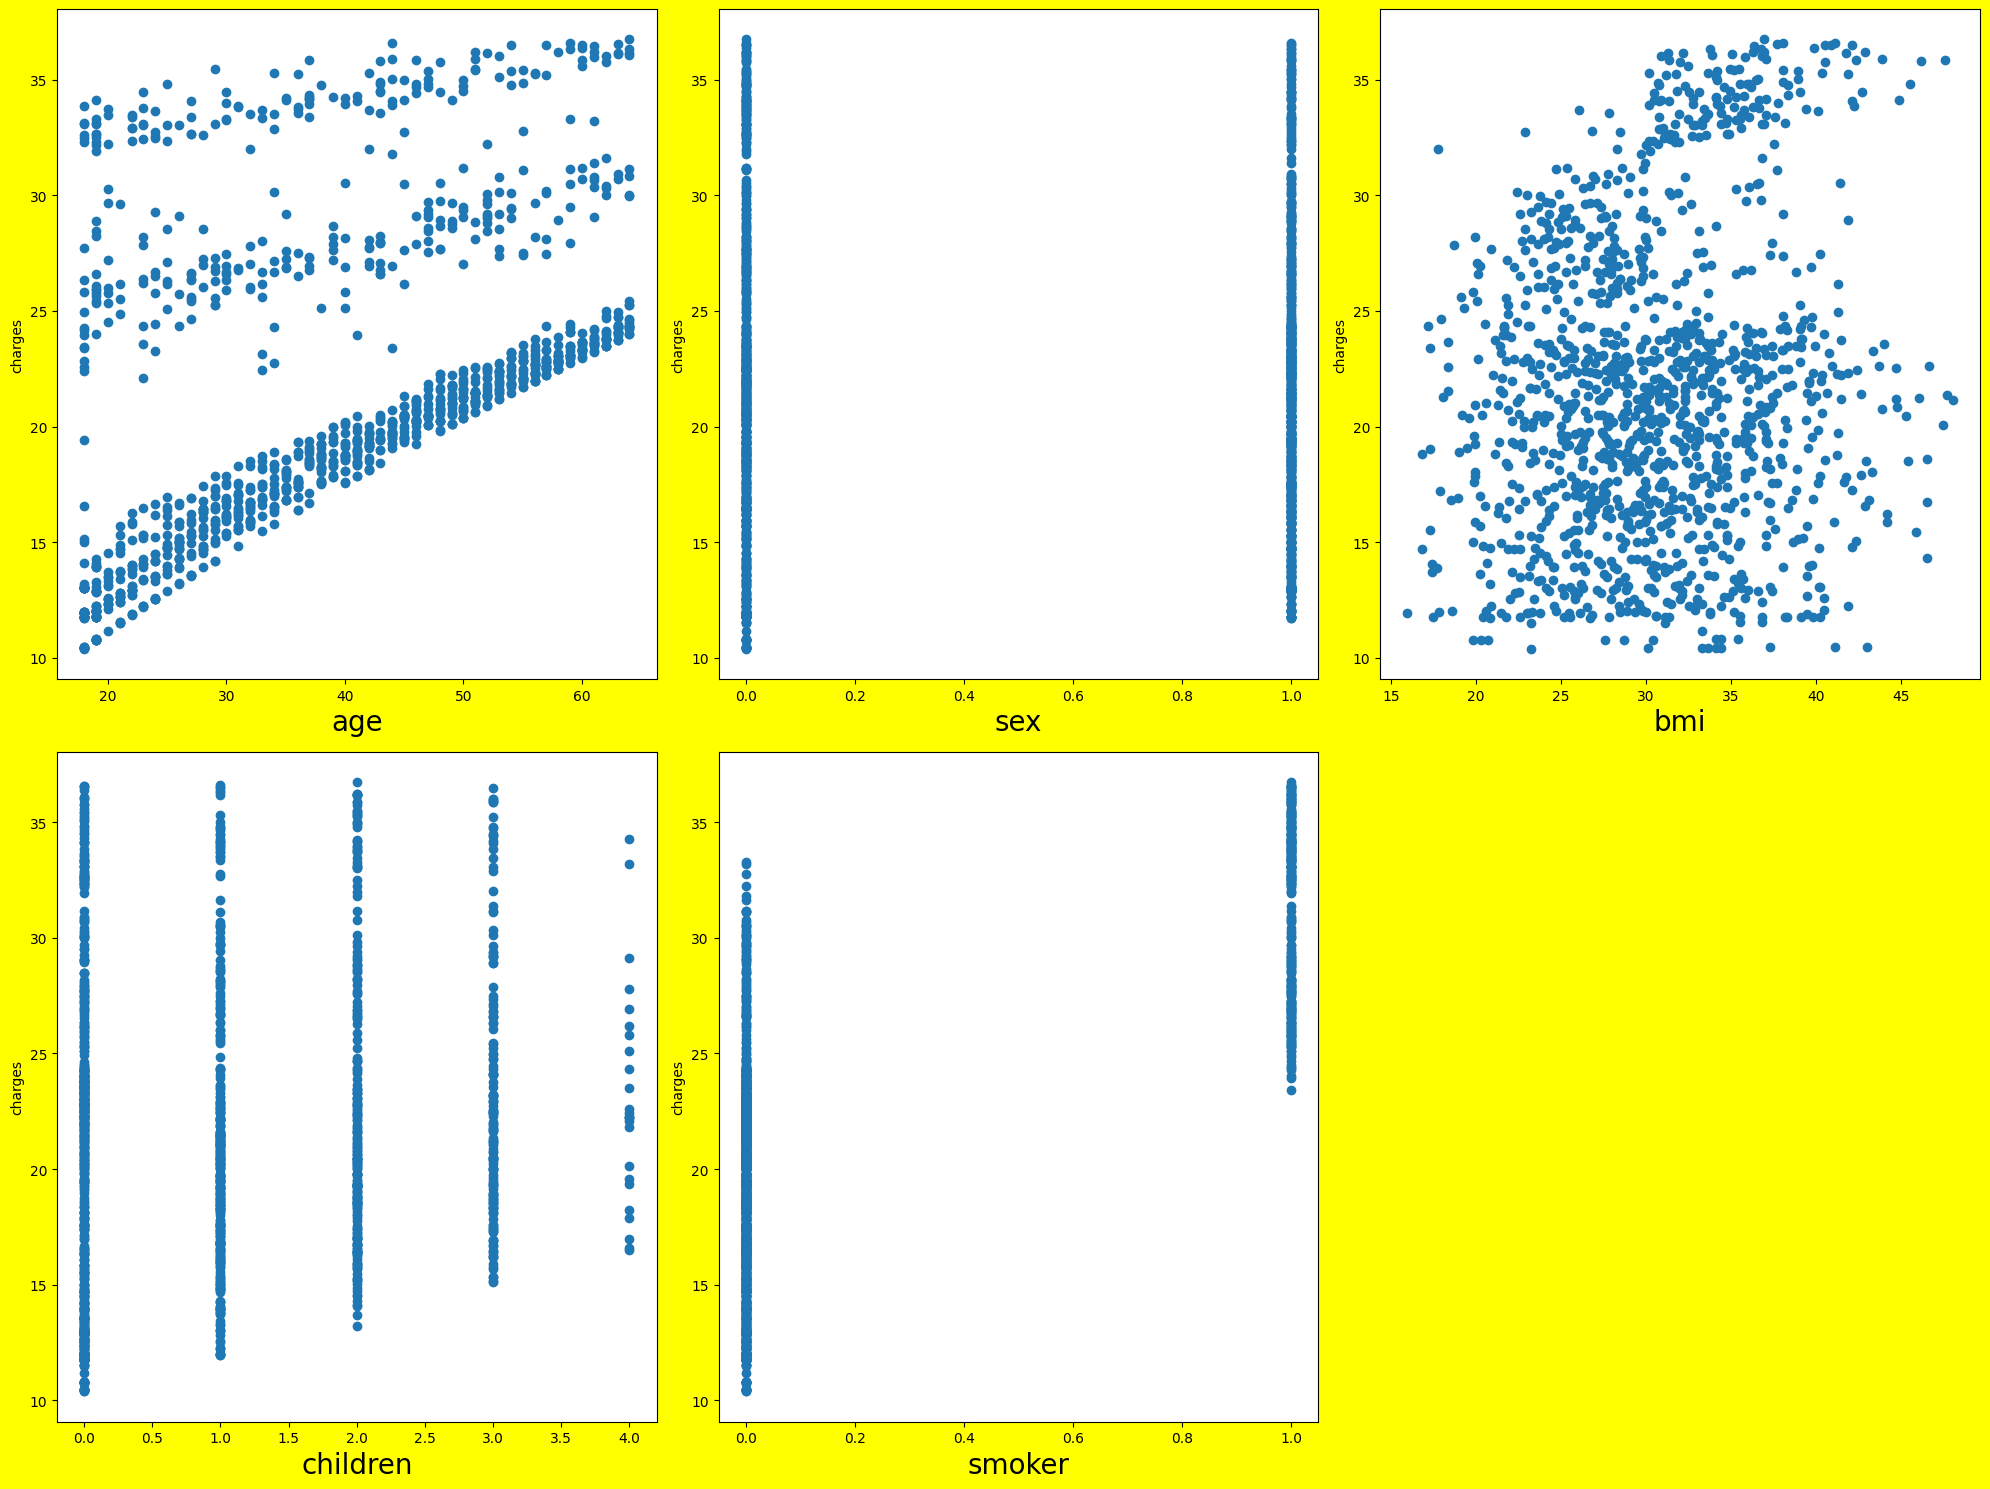

In [26]:
## Feature an label separation

## Relationship between feature and lable
plt.figure(figsize=(20,15), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber<=6:
        anext=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize='20')
        plt.ylabel('charges',fontsize=10)
    plotnumber+=1
plt.tight_layout()    

## Standard Scailing of data

In [27]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

## Analyse influence factor

In [28]:
v_i_f=pd.DataFrame()
v_i_f['vif_val']= [vif(x.values,i) for i in range(len(x.columns))]
v_i_f['feature']=(x.columns)

v_i_f

,vif_val,feature
0,7.739533,age
1,1.920047,sex
2,8.617006,bmi
3,1.850583,children
4,1.247388,smoker


## Finding best fit combination (max range=3000)

In [29]:
max_accuracy=0
max_rs=0
for i in range (3000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    regression_lr=LinearRegression()
    regression_lr.fit(x_train,y_train)
    pred=regression_lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)        


Maximum accuracy: 0.8507293046652096 on random state: 2548


### Train test split

In [30]:

## Train_Test_Fit of Data:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=max_rs)


### REGRESSION MODEL AND ANALYSIS

In [31]:
regression_lr=LinearRegression()
regression_lr.fit(x_train,y_train)
pred_lr=regression_lr.predict(x_test)
pred_lr_train=regression_lr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_lr))
print('r2_score on training data=',r2_score(y_train,pred_lr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_lr))
print('mean_squared_error=', mean_squared_error(y_test,pred_lr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_lr)))

print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_lr=cross_val_score(regression_lr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_lr)
print('avg:',cv_score_lr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_lr)-cv_score_lr.mean())*100)

r2_score= 0.8507293046652096
r2_score on training data= 0.7409838804376896
mean_absolute_error= 1.793312208842607
mean_squared_error= 6.494793540111906
root_mean_square_error 2.5484884814556072
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.8054726  0.71401465 0.82234856 0.76481796 0.75909051]
avg: 0.7731488541943317
Difference between R2_score and CV is: 7.7580450470877915


In [32]:
regression_kn=KNeighborsRegressor()
regression_kn.fit(x_train,y_train)
pred_kn=regression_kn.predict(x_test)
pred_kn_train=regression_kn.predict(x_train)
print('r2_score=',r2_score(y_test,pred_kn))
print('r2_score on training data=',r2_score(y_train,pred_kn_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_kn))
print('mean_squared_error=', mean_squared_error(y_test,pred_kn))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_kn)))
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_kn=cross_val_score(regression_kn,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_kn)
print('avg:',cv_score_kn.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_kn)-cv_score_kn.mean())*100)


r2_score= 0.8654138955291919
r2_score on training data= 0.8240588838433875
mean_absolute_error= 1.530752060754335
mean_squared_error= 5.855864474573142
root_mean_square_error 2.4198893517210953
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.24790273 0.24427108 0.26637333 0.26829347 0.17371398]
avg: 0.24011091679605695
Difference between R2_score and CV is: 62.5302978733135


In [33]:
regression_fr=RandomForestRegressor()
regression_fr.fit(x_train,y_train)
pred_fr=regression_fr.predict(x_test)
pred_fr_train=regression_fr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_fr))
print('r2_score on training data=',r2_score(y_train,pred_fr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_fr))
print('mean_squared_error=', mean_squared_error(y_test,pred_fr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_fr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_fr=cross_val_score(regression_fr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_fr)
print('avg:',cv_score_fr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_fr)-cv_score_fr.mean())*100)

r2_score= 0.8697406000000951
r2_score on training data= 0.9628922790632101
mean_absolute_error= 1.400344517738614
mean_squared_error= 5.667608821415175
root_mean_square_error 2.3806740267023487
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.83074528 0.71603408 0.81696897 0.79003681 0.7794207 ]
avg: 0.7866411675025498
Difference between R2_score and CV is: 8.309943249754536


In [34]:
regression_gb=GradientBoostingRegressor()
regression_gb.fit(x_train,y_train)
pred_gb=regression_gb.predict(x_test)
pred_gb_train=regression_gb.predict(x_train)
print('r2_score=',r2_score(y_test,pred_gb))
print('r2_score on training data=',r2_score(y_train,pred_gb_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_gb))
print('mean_squared_error=', mean_squared_error(y_test,pred_gb))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_gb)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_gb=cross_val_score(regression_gb,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_gb)
print('avg:',cv_score_gb.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_gb)-cv_score_gb.mean())*100)

r2_score= 0.8962449759306798
r2_score on training data= 0.8561535034280277
mean_absolute_error= 1.3016788445252918
mean_squared_error= 4.514398881630441
root_mean_square_error 2.1247114819735975
                                                                 
_______________________CV_SCORE_ANALYSIS________________________


cv_score [0.86316917 0.75535519 0.8755071  0.82189964 0.81200744]
avg: 0.8255877094431657
Difference between R2_score and CV is: 7.0657266487514025


In [35]:
regression_lasso=Lasso()
regression_lasso.fit(x_train,y_train)
pred_lasso=regression_lasso.predict(x_test)
pred_lasso_train=regression_lasso.predict(x_train)
print('r2_score=',r2_score(y_test,pred_lasso))
print('r2_score on training data=',r2_score(y_train,pred_lasso_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_lasso))
print('mean_squared_error=', mean_squared_error(y_test,pred_lasso))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_lasso)))

print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_lasso=cross_val_score(regression_lasso,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_lasso)
print('avg:',cv_score_lasso.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_lasso)-cv_score_lasso.mean())*100)

r2_score= 0.7546734594596913
r2_score on training data= 0.6712994725149914
mean_absolute_error= 2.4356275745372002
mean_squared_error= 10.674199829682431
root_mean_square_error 3.267139395508314
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.63551    0.61014594 0.64217997 0.63085988 0.5534141 ]
avg: 0.6144219757202285
Difference between R2_score and CV is: 14.025148373946283


In [36]:
regression_ridge=Ridge()
regression_ridge.fit(x_train,y_train)
pred_ridge=regression_ridge.predict(x_test)
pred_ridge_train=regression_ridge.predict(x_train)
print('r2_score=',r2_score(y_test,pred_ridge))
print('r2_score on training data=',r2_score(y_train,pred_ridge_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_ridge))
print('mean_squared_error=', mean_squared_error(y_test,pred_ridge))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_ridge)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_ridge=cross_val_score(regression_ridge,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_ridge)
print('avg:',cv_score_ridge.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_ridge)-cv_score_ridge.mean())*100)

r2_score= 0.8505960729528407
r2_score on training data= 0.7409829703007904
mean_absolute_error= 1.7953914123823194
mean_squared_error= 6.500590474753972
root_mean_square_error 2.549625555793237
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.80532109 0.71438641 0.82196001 0.76521656 0.75871477]
avg: 0.7731197678860793
Difference between R2_score and CV is: 7.74763050667614


In [37]:
regression_dtr=DecisionTreeRegressor()
regression_dtr.fit(x_train,y_train)
pred_dtr=regression_dtr.predict(x_test)
pred_dtr_train=regression_dtr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_dtr))
print('r2_score on training data=',r2_score(y_train,pred_dtr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_dtr))
print('mean_squared_error=', mean_squared_error(y_test,pred_dtr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_dtr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_dtr=cross_val_score(regression_dtr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_dtr)
print('avg:',cv_score_dtr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_dtr)-cv_score_dtr.mean())*100)

r2_score= 0.7257600994854303
r2_score on training data= 0.9972005272747869
mean_absolute_error= 1.578428652976592
mean_squared_error= 11.932225078125109
root_mean_square_error 3.4543052960219236
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.72391084 0.59223856 0.59316952 0.67346528 0.49089402]
avg: 0.6147356454188987
Difference between R2_score and CV is: 11.10244540665316


In [38]:
regression_etr=ExtraTreesRegressor()
regression_etr.fit(x_train,y_train)
pred_etr=regression_etr.predict(x_test)
pred_etr_train=regression_etr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_etr))
print('r2_score on training data=',r2_score(y_train,pred_etr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_etr))
print('mean_squared_error=', mean_squared_error(y_test,pred_etr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_etr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_etr=cross_val_score(regression_etr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_etr)
print('avg:',cv_score_etr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_etr)-cv_score_etr.mean())*100)

r2_score= 0.8524663815765908
r2_score on training data= 0.9972005272747869
mean_absolute_error= 1.3214699730555646
mean_squared_error= 6.419213025949947
root_mean_square_error 2.5336165901631498
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.78042518 0.68530965 0.77167256 0.75961221 0.72371856]
avg: 0.7441476335630972
Difference between R2_score and CV is: 10.831874801349361


In [39]:
regression_svr=SVR()
regression_svr.fit(x_train,y_train)
pred_svr=regression_svr.predict(x_test)
pred_svr_train=regression_svr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_svr))
print('r2_score on training data=',r2_score(y_train,pred_svr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_svr))
print('mean_squared_error=', mean_squared_error(y_test,pred_svr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_svr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_svr=cross_val_score(regression_svr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_svr)
print('avg:',cv_score_svr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_svr)-cv_score_svr.mean())*100)

r2_score= 0.9002154140561957
r2_score on training data= 0.782511986586268
mean_absolute_error= 0.9650093748767208
mean_squared_error= 4.341644438226947
root_mean_square_error 2.083661306025273
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [ 0.01000161  0.08989333  0.11229834  0.06256555 -0.1860609 ]
avg: 0.017739585966719852
Difference between R2_score and CV is: 88.24758280894758


In [40]:
from sklearn.model_selection import GridSearchCV
final_model=Ridge(alpha=1,copy_X=True,fit_intercept=True,max_iter=None,tol=0.001,solver='auto',normalize='deprecated',positive='False',random_state='None')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
r2_score=r2_score(y_test,pred)
print(acc*100)

82.24323903144162


In [41]:
## Saving the file:
file_name='MEDICALINSURANCE.pkl'
pickle.dump(final_model,open(file_name,'wb'))